In [6]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from skimage.transform import resize
from matplotlib.colors import PowerNorm
from tnia.plotting.projections import show_xyz_max, show_xyz_slice

### New function
def show_xyz_max_slabs(image_to_show, x = [0,1], y = [0,1], z = [0,1], sxy=1, sz=1,figsize=(10,10), colormap=None, vmax=None, gamma=None):
    """ plots max xy, xz, and zy projections of a 3D image SLABS (slice intervals)

    Args:
        image_to_show (3d numpy array): image to plot
        x: slices for x in format [x_1, x_2] where values are integers, to be passed as slice(x_1, x_2, None)
        y: slices for y in format [y_1, y_2] where values are integers
        z: slices for z in format [z_1, z_2] where values are integers
        sxy (float, optional): xy pixel size of 3D. Defaults to 1.
        sz (float, optional): z pixel size of 3D. Defaults to 1.
        figsize (tuple, optional): figure size. Defaults to (10,10).
        colormap (_type_, optional): _description_. Defaults to None.
        vmax (float, optional): maximum value for display range. Defaults to None.
    """
    ### Coerce into integers for slices
    x_ = [int(i) for i in x]
    y_ = [int(i) for i in y]
    z_ = [int(i) for i in z]

    x_slices = slice(*x)
    y_slices = slice(*y)
    z_slices = slice(*z)

    return show_xyz_projection_slabs(image_to_show, x_slices, y_slices, z_slices, sxy, sz, figsize, np.max, colormap, vmax)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from skimage.transform import resize
from matplotlib.colors import PowerNorm

### New function
def show_xyz_max_slabs(image_to_show, x = [0,1], y = [0,1], z = [0,1], sxy=1, sz=1,figsize=(10,10), colormap=None, vmax=None, gamma=None):
    """ plots max xy, xz, and zy projections of a 3D image SLABS (slice intervals)

    Args:
        image_to_show (3d numpy array): image to plot
        x: slices for x in format [x_1, x_2] where values are integers, to be passed as slice(x_1, x_2, None)
        y: slices for y in format [y_1, y_2] where values are integers
        z: slices for z in format [z_1, z_2] where values are integers
        sxy (float, optional): xy pixel size of 3D. Defaults to 1.
        sz (float, optional): z pixel size of 3D. Defaults to 1.
        figsize (tuple, optional): figure size. Defaults to (10,10).
        colormap (_type_, optional): _description_. Defaults to None.
        vmax (float, optional): maximum value for display range. Defaults to None.
    """
    ### Coerce into integers for slices
    x_ = [int(i) for i in x]
    y_ = [int(i) for i in y]
    z_ = [int(i) for i in z]

    x_slices = slice(*x)
    y_slices = slice(*y)
    z_slices = slice(*z)

    return show_xyz_projection_slabs(image_to_show, x_slices, y_slices, z_slices, sxy, sz, figsize, np.max, colormap, vmax)


### New function
def show_xyz_projection_slabs(image_to_show, x_slices, y_slices, z_slices, sxy=1, sz=1,figsize=(10,10), projector=np.max, colormap=None, vmax=None, gamma=None):
    """ generates xy, xz, and zy max projections of a 3D image and plots them

    Args:
        image_to_show (3d numpy array): image to plot
        sxy (float, optional): xy pixel size of 3D. Defaults to 1.
        sz (float, optional): z pixel size of 3D. Defaults to 1.
        figsize (tuple): size of figure to
        projector: function to project with
        colormap (_type_, optional): _description_. Defaults to None.
        vmax (float, optional): maximum value for display range. Defaults to None.
    """
    projection_y = projector(image_to_show[:,y_slices,:],1)
    projection_x = np.flip(np.rot90(projector(image_to_show[:,:,x_slices],2),1),0)
    projection_z = projector(image_to_show[z_slices,:,:],0)

    return _show_xyz(projection_z, projection_y, projection_x, sxy, sz, figsize, colormap, vmax, gamma)


### Adjust layout = constrained (including gridspec)
def _show_xyz(xy, xz, zy, sxy=1, sz=1,figsize=(6,6), colormap=None, vmax=None, gamma=None):
    """ shows pre-computed xy, xz and zy of a 3D image in a plot

    Args:
        xy (2d numpy array): xy projection
        xz (2d numpy array): xz projection
        zy (2d numpy array): zy projection
        sxy (float, optional): xy pixel size of 3D. Defaults to 1.
        sz (float, optional): z pixel size of 3D. Defaults to 1.
        figsize (tuple, optional): figure size. Defaults to (10,10).
        colormap (_type_, optional): _description_. Defaults to None.
        vmax (float, optional): maximum value for display range. Defaults to None.
    Returns:
        [type]: [description]
    """
    ### constrained layout
    fig=plt.figure(figsize=figsize, layout='constrained')

    xdim = xy.shape[1]
    ydim = xy.shape[0]
    zdim = xz.shape[0]

    z_xy_ratio=1

    if sxy!=sz:
        z_xy_ratio=sz/sxy
    ### constrained layout that works with gridspec (figure = fig)
    spec=gridspec.GridSpec(ncols=2, nrows=2, height_ratios=[ydim,zdim*z_xy_ratio], width_ratios=[xdim,zdim*z_xy_ratio],hspace=.01, figure = fig)

    ax0=fig.add_subplot(spec[0])
    ax1=fig.add_subplot(spec[1])
    ax2=fig.add_subplot(spec[2])

    if z_xy_ratio!=1:
        xz=resize(xz, (int(xz.shape[0]*z_xy_ratio), xz.shape[1]))
        zy=resize(zy, (zy.shape[0], int(zy.shape[1]*z_xy_ratio)))

    if gamma is None:
        ax0.imshow(xy, colormap, vmax=vmax, extent=[0,xdim*sxy,ydim*sxy,0])
        ax0.set_title('xy')
        ax1.imshow(zy, colormap, vmax=vmax, extent=[0,zdim*sz,ydim*sxy,0])
        ax1.set_title('zy')
        ax2.imshow(xz, colormap, vmax=vmax, extent=[0,xdim*sxy,zdim*sz,0])
        ax2.set_title('xz')
    else:
        norm=PowerNorm(gamma=gamma, vmax=vmax)
        ax0.imshow(xy, colormap, norm=norm, extent=[0,xdim*sxy,ydim*sxy,0])
        ax0.set_title('xy')
        ax1.imshow(zy, colormap, norm=norm, extent=[0,zdim*sz,ydim*sxy,0])
        ax1.set_title('zy')
        ax2.imshow(xz, colormap, norm=norm, extent=[0,xdim*sxy,zdim*sz,0])
        ax2.set_title('xz')

    return fig

In [3]:
### Adjust layout = constrained (including gridspec)
def _show_xyz(xy, xz, zy, sxy=1, sz=1,figsize=(6,6), colormap=None, vmax=None, gamma=None):
    """ shows pre-computed xy, xz and zy of a 3D image in a plot

    Args:
        xy (2d numpy array): xy projection
        xz (2d numpy array): xz projection
        zy (2d numpy array): zy projection
        sxy (float, optional): xy pixel size of 3D. Defaults to 1.
        sz (float, optional): z pixel size of 3D. Defaults to 1.
        figsize (tuple, optional): figure size. Defaults to (10,10).
        colormap (_type_, optional): _description_. Defaults to None.
        vmax (float, optional): maximum value for display range. Defaults to None.
    Returns:
        [type]: [description]
    """
    ### constrained layout
    fig=plt.figure(figsize=figsize, layout='constrained')

    xdim = xy.shape[1]
    ydim = xy.shape[0]
    zdim = xz.shape[0]

    z_xy_ratio=1

    if sxy!=sz:
        z_xy_ratio=sz/sxy
    ### constrained layout that works with gridspec (figure = fig)
    spec=gridspec.GridSpec(ncols=2, nrows=2, height_ratios=[ydim,zdim*z_xy_ratio], width_ratios=[xdim,zdim*z_xy_ratio],hspace=.01, figure = fig)

    ax0=fig.add_subplot(spec[0])
    ax1=fig.add_subplot(spec[1])
    ax2=fig.add_subplot(spec[2])

    if z_xy_ratio!=1:
        xz=resize(xz, (int(xz.shape[0]*z_xy_ratio), xz.shape[1]))
        zy=resize(zy, (zy.shape[0], int(zy.shape[1]*z_xy_ratio)))

    if gamma is None:
        ax0.imshow(xy, colormap, vmax=vmax, extent=[0,xdim*sxy,ydim*sxy,0])
        ax0.set_title('xy')
        ax1.imshow(zy, colormap, vmax=vmax, extent=[0,zdim*sz,ydim*sxy,0])
        ax1.set_title('zy')
        ax2.imshow(xz, colormap, vmax=vmax, extent=[0,xdim*sxy,zdim*sz,0])
        ax2.set_title('xz')
    else:
        norm=PowerNorm(gamma=gamma, vmax=vmax)
        ax0.imshow(xy, colormap, norm=norm, extent=[0,xdim*sxy,ydim*sxy,0])
        ax0.set_title('xy')
        ax1.imshow(zy, colormap, norm=norm, extent=[0,zdim*sz,ydim*sxy,0])
        ax1.set_title('zy')
        ax2.imshow(xz, colormap, norm=norm, extent=[0,xdim*sxy,zdim*sz,0])
        ax2.set_title('xz')

    return fig

In [4]:
### Use skimage cells data

from skimage.data import cells3d

image_3D = cells3d()
print(f'image_3D.shape: {image_3D.shape}')

nuclei_3D = image_3D[:,1,...]  # pick channel, make sure ZYX dim order
print(f'nuclei_3D.shape: {nuclei_3D.shape}')

image_3D.shape: (60, 2, 256, 256)
nuclei_3D.shape: (60, 256, 256)


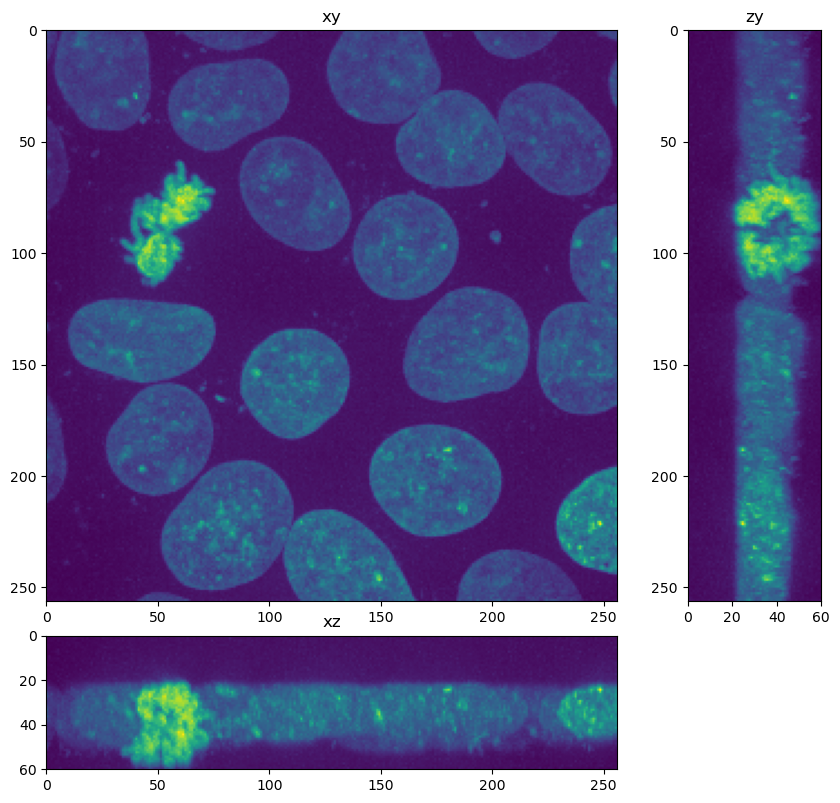

In [7]:
fig = show_xyz_max(nuclei_3D)

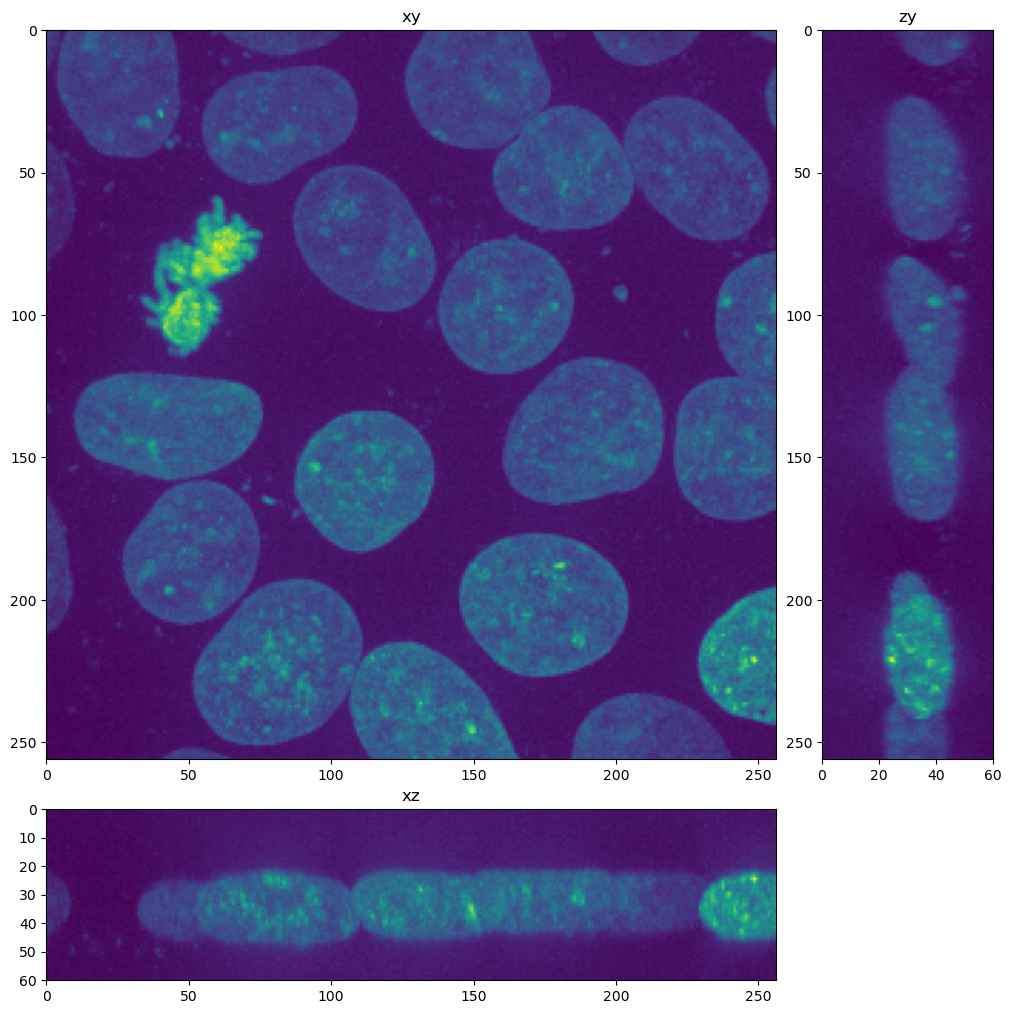

In [11]:

fig = show_xyz_max_slabs(nuclei_3D, x = [200,250], y = [200,250], z = [0,60])
#fig = show_xyz_max_slabs(nuclei_3D)